In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

X=iris.data
y=iris.target

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
for method in ['multinomial', 'ovr']:
    lr = LR(solver='sag',random_state=42,multi_class=method).fit(X,y)
    print(lr.score(iris.data,iris.target),method)
    

0.9866666666666667 multinomial
0.96 ovr


C:\Users\HUA\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HUA\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HUA\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\HUA\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [5]:
'''评分卡模型'''

'评分卡模型'

In [6]:
data = pd.read_csv(r'C:\Users\HUA\Desktop\数据分析\数据和项目\cc\rankingcard.csv',index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [8]:
data.drop_duplicates(inplace=True)
data.index = range(data.shape[0])

In [9]:
data.isnull().sum()/data.shape[0]
data['NumberOfDependents'].fillna(value=data['NumberOfDependents'].mean(),inplace=True)

In [10]:
#随机森林填补收入
from sklearn.ensemble import RandomForestRegressor as RFR

In [11]:
data_fill = data.copy()
data_fill['MonthlyIncome'].isnull()

train_fill = data_fill.loc[data_fill['MonthlyIncome'].notnull(),:]
test_fill = data_fill.loc[data_fill['MonthlyIncome'].isnull(),:]

train_fill.index = range(train_fill.shape[0])
test_fill.index = range(test_fill.shape[0])

Xtrain_fill = train_fill.loc[:,train_fill.columns!='MonthlyIncome']
Xtest_fill = test_fill.loc[:,test_fill.columns!='MonthlyIncome']
ytrain_fill = train_fill.loc[:,train_fill.columns=='MonthlyIncome']
ytest_fill = test_fill.loc[:,test_fill.columns=='MonthlyIncome']

rfr = RFR(n_estimators=100)
rfr = rfr.fit(Xtrain_fill,ytrain_fill.values.ravel())#<---升维度
ypredict = rfr.predict(Xtest_fill)

In [12]:
ypredict

array([0.18, 0.25, 0.12, ..., 0.21, 0.06, 0.  ])

In [13]:
ypredict.shape

(29221,)

In [14]:
data.loc[data['MonthlyIncome'].isnull(),'MonthlyIncome']=ypredict

In [15]:
data.describe([0.01,0.99]).T

,count,mean,std,min,1%,50%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.154235,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,52.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.368234,4985.100000,329664.0
MonthlyIncome,149391.0,5426.767801,13232.119070,0.0,0.0,4423.000000,23205.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,8.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,1.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,2.000000,98.0


In [16]:
data = data[data['age']!=0]

In [17]:
(data['NumberOfTimes90DaysLate']>90).sum()
data[data.loc[:,'NumberOfTimes90DaysLate']>90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [18]:
data.loc[data['NumberOfTimes90DaysLate']>90,'SeriousDlqin2yrs']

1732      1
2285      0
3883      0
4416      0
4704      0
         ..
146667    1
147180    1
148548    1
148634    0
148833    1
Name: SeriousDlqin2yrs, Length: 225, dtype: int64

In [26]:
data = data[data.loc[:,'NumberOfTimes90DaysLate']<90]

In [27]:
data.shape

(149165, 11)

In [28]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

y.value_counts()


0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
'''上采样平衡样本'''
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=41)
X,y = sm.fit_sample(X,y)
n_sample_=X.shape[0]

In [34]:
pd.Series(y).value_counts()

1    139292
0    139292
Name: SeriousDlqin2yrs, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train, X_vali, y_train, y_vali = train_test_split(X,y,test_size=0.3,random_state=42)
model_data = pd.concat([X_train, y_train], axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [40]:
vali_data = pd.concat([X_vali, y_vali],axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

In [41]:
model_data.to_csv(r'C:\Users\HUA\Desktop\数据分析\数据和项目\cc\评分卡模型数据.csv')
vali_data.to_csv(r'C:\Users\HUA\Desktop\数据分析\数据和项目\cc\评分卡验证数据.csv')

In [ ]:
'''下面开始分箱，做评分种类
Information value： IV=sum(good%-bad%)*WOE'''

In [ ]:
data.head()
data.info()

In [42]:
model_data['qcut'],updown = pd.qcut(model_data['age'],retbins=True, q=20)
model_data['qcut']

0         (43.0, 45.0]
1         (58.0, 61.0]
2         (50.0, 52.0]
3         (52.0, 54.0]
4         (39.0, 41.0]
              ...     
195003    (43.0, 45.0]
195004    (50.0, 52.0]
195005    (61.0, 64.0]
195006    (28.0, 31.0]
195007    (68.0, 74.0]
Name: qcut, Length: 195008, dtype: category
Categories (20, interval[float64]): [(20.999, 28.0] < (28.0, 31.0] < (31.0, 34.0] < (34.0, 36.0] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 109.0]]

In [43]:
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  47.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 109.])

In [44]:
model_data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs,qcut
0,1.014577,44,5,2844.189604,601.248196,13,0,2,1,0.0,1,"(43.0, 45.0]"
1,0.067156,59,0,0.377116,9744.000000,25,0,2,0,0.0,0,"(58.0, 61.0]"
2,0.030254,51,0,0.615891,3800.000000,16,0,2,0,0.0,0,"(50.0, 52.0]"
3,0.597144,53,3,2608.096465,0.255330,8,2,1,1,0.0,1,"(52.0, 54.0]"
4,0.025159,40,0,0.178416,13333.000000,6,0,1,0,0.0,0,"(39.0, 41.0]"


In [57]:
count_y0 = model_data[model_data['SeriousDlqin2yrs']==0].groupby(by='qcut').count()['SeriousDlqin2yrs']

In [62]:
count_y1 = model_data[model_data['SeriousDlqin2yrs']==1].groupby(by='qcut').count()['SeriousDlqin2yrs']
#各个箱子中编号为1的个数
count_y1

qcut
(20.999, 28.0]    7412
(28.0, 31.0]      5907
(31.0, 34.0]      6744
(34.0, 36.0]      4674
(36.0, 39.0]      7434
(39.0, 41.0]      5920
(41.0, 43.0]      5608
(43.0, 45.0]      5816
(45.0, 47.0]      6284
(47.0, 48.0]      3064
(48.0, 50.0]      6133
(50.0, 52.0]      5821
(52.0, 54.0]      4883
(54.0, 56.0]      4136
(56.0, 58.0]      3564
(58.0, 61.0]      4896
(61.0, 64.0]      3191
(64.0, 68.0]      2437
(68.0, 74.0]      1913
(74.0, 109.0]     1303
Name: SeriousDlqin2yrs, dtype: int64

In [63]:
numbins = [*zip(updown, updown[1:],count_y0,count_y1)] #zip之后返回一个zip文件，用*解开查看|||updown有21条数据，把前20条和从一条开始的20条作为上下限zip到一起
numbins 

[(21.0, 28.0, 4226, 7412),
 (28.0, 31.0, 3558, 5907),
 (31.0, 34.0, 4056, 6744),
 (34.0, 36.0, 2824, 4674),
 (36.0, 39.0, 5126, 7434),
 (39.0, 41.0, 3935, 5920),
 (41.0, 43.0, 4044, 5608),
 (43.0, 45.0, 4407, 5816),
 (45.0, 47.0, 4757, 6284),
 (47.0, 48.0, 2487, 3064),
 (48.0, 50.0, 4933, 6133),
 (50.0, 52.0, 4732, 5821),
 (52.0, 54.0, 4697, 4883),
 (54.0, 56.0, 4660, 4136),
 (56.0, 58.0, 4480, 3564),
 (58.0, 61.0, 6777, 4896),
 (61.0, 64.0, 7005, 3191),
 (64.0, 68.0, 6644, 2437),
 (68.0, 74.0, 6766, 1913),
 (74.0, 109.0, 7754, 1303)]

In [70]:
'''对于没有0或1的箱子进行合并,只有第一个箱子向后合并，别的都向前合并'''
for i in range(20):
    if 0 in numbins[0][2:]:
        numbins[0:2]=[(
                    numbins[0][0],
                    numbins[1][1],
                    numbins[0][2]+numbins[1][2],
                    numbins[0][3]+numbins[1][3])]
        continue
    
    for i in range(len(numbins)):
        if 0 in numbins[i][2:]:
            numbins[i-1,i+1]=[(
                    numbins[i-1][0],
                    numbins[i][1],
                    numbins[i-1][2]+numbins[i][2],
                    numbins[i-1][3]+numbins[i][3])]
            break
    else:
        break

In [82]:
#WOE表示在这个箱子中的优质率
def get_WOE(numbins):
    columns = ['min','max','count_0','count_1']
    df = pd.DataFrame(numbins, columns=columns)
    
    df['total'] = df['count_0']+df['count_1']#单个箱子的总数
    df['percentage'] = df.total/df.total.sum() #这个箱子的数量占总数据比重
    df['bad_rate'] = df.count_1/df.total #在本箱子中！！！！！的坏样本占本箱子的百分比
    df['bad%'] = df.count_1/df.count_1.sum() 
    df['good%'] = df.count_0/df.count_0.sum()
    df['woe'] = np.log2(df['good%']/df['bad%']) #值越大，箱子里好样本占比越大
    
    return df

In [83]:
#IV表示整体的特征贡献
def get_iv(df):
    g_b_diff = (df['good%']-df['bad%'])
    iv = np.sum(g_b_diff*df['woe'])
    return iv

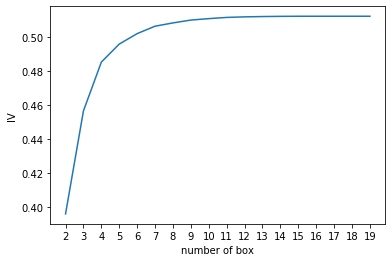

In [84]:
# numbins_ = numbins.copy()
# '''通过看IV值找出最优分箱个数：
#     从20个箱子开始，先找出相邻两箱的p值差异，选出最大的依次合并，
#     知道合并到最后只有两个箱子，
#     然后画出相应的iv图'''
# import scipy

# IV=[]
# axisx = []

# while len(numbins_) > 2:
#     pvs = [] #p值
#     for i in range(len(numbins_)-1): #对分箱样本进行四格卡方检验，为了确定相邻的箱子是否彼此独立，或者说有必要分箱
#         x1 = numbins_[i][2:]
#         x2 = numbins_[i+1][2:]
#         pv = scipy.stats.chi2_contingency([x1,x2])[1] #第一个返回值为chi2值
        
#         pvs.append(pv)
    
#     i = pvs.index(max(pvs))
#     numbins_[i:i+2] = [(
#             numbins_[i][0],
#             numbins_[i+1][1],
#             numbins_[i][2]+numbins_[i+1][2],
#             numbins_[i][3]+numbins_[i+1][3])]
    
#     bins_df = get_WOE(numbins_)
#     axisx.append(len(numbins_))
#     IV.append(get_iv(bins_df))

# plt.figure()
# plt.plot(axisx,IV)
# plt.xticks(axisx)
# plt.xlabel('number of box')
# plt.ylabel('IV')
# plt.show()
# #转折点：6，即对‘age’来说，分6箱最好

In [99]:
def get_bin(numbins_, n):
    while len(numbins_) > n:
        pvs = []
        for i in range(len(numbins_)-1):
            x1 = numbins_[i][2:]
            x2 = numbins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            
            pvs.append(pv)
            
        i = pvs.index(max(pvs))
        numbins_[i:i+2] = [(
            numbins_[i][0],
            numbins_[i+1][1],
            numbins_[i][2]+numbins_[i+1][2],
            numbins_[i][3]+numbins_[i+1][3])]
    return numbins_


In [101]:
afterbins = get_bin(numbins,6)
afterbinsb

[(21.0, 41.0, 23725, 38091),
 (41.0, 52.0, 25360, 32726),
 (52.0, 61.0, 20614, 17479),
 (61.0, 68.0, 13649, 5628),
 (68.0, 74.0, 6766, 1913),
 (74.0, 109.0, 7754, 1303)]

In [102]:
bins_df = get_WOE(afterbins)
bins_df
#WOE单调，afterbins = get_bin(numbins,6)，把n调成5，中间两个相近的卡方检验也不消失，就保留6
#afterbinsb且和bad rate一样，两两之间差异较大

,min,max,count_0,count_1,total,percentage,bad_rate,bad%,good%,woe
0,21.0,41.0,23725,38091,61816,0.316992,0.616200,0.392125,0.242418,-0.693814
1,41.0,52.0,25360,32726,58086,0.297865,0.563406,0.336895,0.259125,-0.378654
2,52.0,61.0,20614,17479,38093,0.195341,0.458851,0.179936,0.210631,0.227230
3,61.0,68.0,13649,5628,19277,0.098852,0.291954,0.057937,0.139463,1.267329
4,68.0,74.0,6766,1913,8679,0.044506,0.220417,0.019693,0.069134,1.811695
5,74.0,109.0,7754,1303,9057,0.046444,0.143867,0.013414,0.079229,2.562332


In [143]:
'''完整封装分箱函数，以便对各个参数进行分别分箱

param:
        DF：需要输入的数据
        x：分箱用的列名
        y：分箱数据对应的标签的列名
        n：保留个数
        q：初始分箱个数'''

def graphforbestbins(DF, X, Y, n=5, q=20, graph=True):
    DF = DF[[X,Y]].copy()
    
    DF['qcut'], bins = pd.qcut(DF[X],q=q,retbins=True,duplicates='drop')
    count_y0 = DF.loc[DF[Y]==0].groupby(by='qcut').count()[Y]
    count_y1 = DF.loc[DF[Y]==1].groupby(by='qcut').count()[Y]
    num_bins = [*zip(bins, bins[1:],count_y0,count_y1)]
    
    print('numbins',num_bins[1][1])
    for i in range(q):
        if 0 in num_bins[0][:2]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue #第一个和第二个一样，为后面向前合并做准备
        
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1,i+1]=[(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break
    
    def get_WOE(num_bins):
        columns = ['min','max','count_0','count_1']
        df = pd.DataFrame(num_bins, columns=columns)
        
        df['total'] = df['count_0']+df['count_1']#单个箱子的总数
        df['percentage'] = df.total/df.total.sum() #这个箱子的数量占总数据比重
        df['bad_rate'] = df.count_1/df.total #在本箱子中！！！！！的坏样本占本箱子的百分比
        df['bad%'] = df.count_1/df.count_1.sum() 
        df['good%'] = df.count_0/df.count_0.sum()
        df['woe'] = np.log2(df['good%']/df['bad%']) #值越大，箱子里好样本占比越大
    
        return df
    
    def get_iv(df):
        g_b_diff = (df['good%']-df['bad%'])
        iv = np.sum(g_b_diff*df['woe'])
        return iv
    
    IV=[]
    axisx = []
    while len(num_bins) > n:
        pvs = [] #p值
        for i in range(len(num_bins)-1): #对分箱样本进行四格卡方检验，为了确定相邻的箱子是否彼此独立，或者说有必要分箱
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1] #第一个返回值为chi2值

            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
                num_bins[i][0],
                num_bins[i+1][1],
                num_bins[i][2]+num_bins[i+1][2],
                num_bins[i][3]+num_bins[i+1][3])]

        bins_df = pd.DataFrame(get_WOE(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel('number of box')
        plt.ylabel('IV')
        plt.show()
    return bins_df

age
numbins 31.0


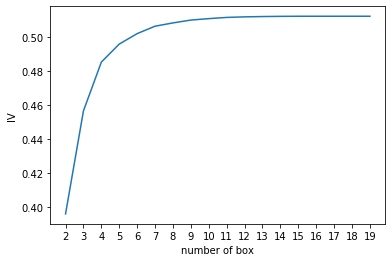

NumberOfTime30-59DaysPastDueNotWorse
numbins 2.0


IndexError: list index out of range

In [144]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbins(model_data,i,'SeriousDlqin2yrs',n=2,q=20)


In [148]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    '''
    自动最优分箱函数，基于卡方检验的分箱
    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像
    区间为前开后闭 (]
    '''
    DF = DF[[X,Y]].copy()
    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
            num_bins[0][0],
            num_bins[1][1],
            num_bins[0][2]+num_bins[1][2],
            num_bins[0][3]+num_bins[1][3])]
        continue
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
            break
        else:
            break
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv
    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
        num_bins[i][0],
        num_bins[i+1][1],
        num_bins[i][2]+num_bins[i+1][2],
        num_bins[i][3]+num_bins[i+1][3])]
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df

In [150]:
for i in model_data.columns[0:-1]:
    print(i)
    graphforbestbins(model_data,i,'SeriousDlqin2yrs',n=2,q=20)

RevolvingUtilizationOfUnsecuredLines
numbins 0.015474100861270493


IndexError: list index out of range

In [131]:
model_data.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs', 'qcut'],
      dtype='object')

In [96]:
len(numbins)

20